In [1]:
from PyUncertainNumber.UC.uncertainNumber import UncertainNumber as UN
from PyUncertainNumber.UC.statisticalInference import *
from PyUncertainNumber.UC.utils import pl_ecdf, pl_pcdf

In [2]:
from intervals import Interval as I
from scipy.stats import CensoredData
import scipy.stats as sps
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2
%load_ext rich
%matplotlib inline

# precise data

## MLE method

In [ ]:
# test data from Scott

datat = 2 * np.random.normal(size=25)

In [ ]:
dist = MLnormal(datat)

In [ ]:
dist

In [ ]:
_ = pl_pcdf(dist, title='Gaussian MLE estimated dist given precise data')

# imprecise data

My current idea will be:

- UN produces pbox via MLE and MoM
- sps still returns precise distribution object anyway.

In [ ]:
scott_rawData = [[8,11], [5.5,6.9], [0.3, 1.3], [3.5,7.5], [0.8,1], [2.8,4.2], [1.8,5.2], [2.2,5.2], [3.5,5.7], [5.3,6.1]]

In [ ]:
''' vanilla scipy imp which looks weird '''
# data_imp = CensoredData(interval=scott_rawData)
# data_imp

In [ ]:
lo_endpoints = [it[0] for it in scott_rawData] # Low ends of the intervals
hi_endpoints = [it[1] for it in scott_rawData] # High ends of the intervals

In [ ]:
data_i = CensoredData.interval_censored(low=lo_endpoints, high=hi_endpoints)
print(data_i)

In [ ]:
''' the same as data_imp '''
data_i

In [ ]:
type(data_i)

In [ ]:
dist_i_scipy = MLnormal(data_i)
# we do get to see the params of a scipy.stats.frozon object
dist_i_scipy.args
# dir(dist_i_scipy)
_ = pl_pcdf(dist_i_scipy, title='Gaussian MLE estimated dist given imprecise data')

#### Exponential distribution tet

In [4]:
x = I(lo=[1,3], hi=[2,4])
x


[1.0,2.0]
[3.0,4.0]

## MLE method

In [5]:
mle_expon = MLexponential(x)

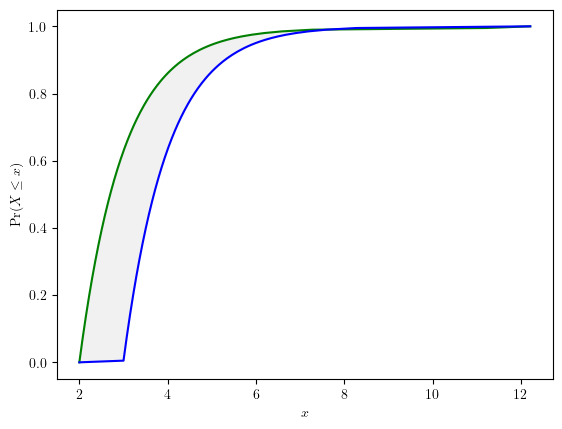

In [7]:
_ = mle_expon.display(style='band')

## MoM method

In [8]:
mom_expon = MMexponential(x)

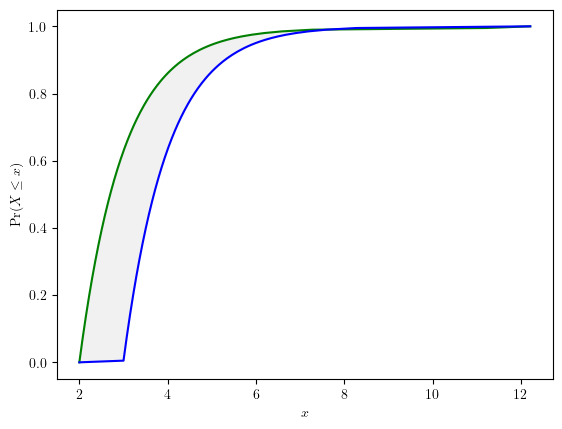

In [9]:
_ = mom_expon.display(style='band')